In [28]:
import pandas as pd

df = pd.read_csv("data.csv")
df


,text,label
0,the boy is stealing cookies while the mother w...,control
1,the mother is washing dishes and the water is ...,control
2,uh the boy is uh taking cookies and the water ...,alzheimer
3,the boy is taking cookies the uh mother is was...,alzheimer


In [29]:
df["word_count"] = df["text"].apply(lambda x: len(x.split()))
df


,text,label,word_count
0,the boy is stealing cookies while the mother w...,control,10
1,the mother is washing dishes and the water is ...,control,10
2,uh the boy is uh taking cookies and the water ...,alzheimer,13
3,the boy is taking cookies the uh mother is was...,alzheimer,11


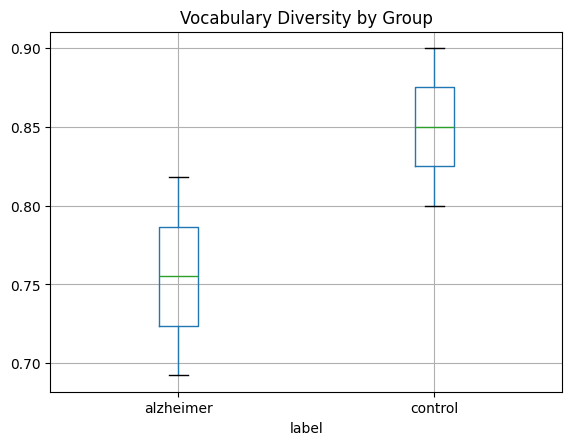

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def vocabulary_diversity(text):
    words = text.split()
    return len(set(words)) / len(words)

df["vocab_diversity"] = df["text"].apply(vocabulary_diversity)
df

from collections import Counter

def repetition_score(text):
    words = text.split()
    most_common = Counter(words).most_common(1)[0][1]
    return most_common / len(words)

df["repetition"] = df["text"].apply(repetition_score)
df


df.groupby("label")[["word_count", "vocab_diversity", "repetition"]].mean()


df.boxplot(column="vocab_diversity", by="label")
plt.title("Vocabulary Diversity by Group")
plt.suptitle("")
plt.show()
